In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import json
from collections import Counter
import pyarrow
import pandas_profiling
import folium
from IPython.display import display, IFrame
import tempfile
import os
import seaborn as sns


warnings.filterwarnings('ignore')

In [46]:
metadata_sitios = pd.read_parquet('metadata_sitios.parquet')
reviews_estados = pd.read_parquet('reviews_estados.parquet')
user = pd.read_parquet('user.parquet')
review = pd.read_parquet('review.parquet')
tip = pd.read_parquet('tip.parquet')
checkin = pd.read_parquet('checkin.parquet')
business = pd.read_parquet('business.parquet')

In [47]:
map = folium.Map(
    location=[metadata_sitios['latitude'].mean(), metadata_sitios['longitude'].mean()],
    zoom_start=5
)

# Añadir marcadores al mapa
for _, row in metadata_sitios.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# Mostrar el mapa
map

In [48]:
map = folium.Map(
    location=[business['latitude'].mean(), business['longitude'].mean()],
    zoom_start=5
)

# Añadir marcadores al mapa
for _, row in business.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# Mostrar el mapa
map

In [49]:
metadata_sitios.head()

name  \
11    Stagecoach Inn Restaurant and Lodge   
829                Charleys Philly Steaks   
840                Charleys Philly Steaks   
4644             Ruth's Chris Steak House   
4771                                 Wawa   

                                    gmap_id   latitude  longitude  \
11    0x87de5daa7cc7aefd:0x4220d709052263db  39.441171 -90.870254   
829   0x89c2fad0e50bf7cb:0x54444ad44d42f751  40.956903 -74.069185   
840   0x89c3953fd908dfdd:0xdd16fbfbd5c00287  40.585621 -74.618851   
4644  0x8629d208ffeacbaf:0x34a7c3f19e96773b  32.435502 -90.148161   
4771  0x89c6d1b9c859e8d3:0x31cd6538a59b1652  39.806306 -75.094958   

                                               category  avg_rating  \
11    [Restaurant, Dessert shop, Hamburger restauran...         4.6   
829   [Cheesesteak restaurant, American restaurant, ...         4.0   
840   [Cheesesteak restaurant, American restaurant, ...         3.7   
4644  [Restaurant, American restaurant, Caterer, Fin...         4.2   
4771  [Convenience store, Breakfast restaurant, Cafe...         4.2   

      num_of_reviews                                                url states  
11                38  https://www.google.com/maps/place//data=!4m2!3...     IL  
829               18  https://www.google.com/maps/place//data=!4m2!3...     NJ  
840               36  https://www.google.com/maps/place//data=!4m2!3...     NJ  
4644              37  https://www.google.com/maps/place//data=!4m2!3...     MS  
4771              78  https://www.google.com/maps/place//data=!4m2!3...     NJ

In [50]:
metadata_sitios.describe()

latitude    longitude   avg_rating  num_of_reviews
count  1568.000000  1568.000000  1568.000000     1568.000000
mean     35.672028   -90.994136     4.067602      116.826531
std       4.880153    15.566007     0.528398      311.274330
min      24.666666  -122.895625     1.000000        1.000000
25%      32.170252   -97.524073     3.800000       24.000000
50%      36.338842   -87.625960     4.200000       48.000000
75%      39.961441   -75.661022     4.400000       98.000000
max      48.236308   -73.951126     5.000000     4379.000000

In [51]:
metadata_sitios.isnull().sum()

name              0
gmap_id           0
latitude          0
longitude         0
category          0
avg_rating        0
num_of_reviews    0
url               0
states            0
dtype: int64

In [52]:
reviews_estados = pd.read_parquet('reviews_estados.parquet')
user = pd.read_parquet('user.parquet')
review = pd.read_parquet('review.parquet')
tip = pd.read_parquet('tip.parquet')
checkin = pd.read_parquet('checkin.parquet')
business = pd.read_parquet('business.parquet')

In [53]:
reviews_estados.head()

user_id        time  rating  \
0  1.171925e+20  2021-03-31       5   
1  1.153772e+20  2017-06-21       5   
2  1.106018e+20  2021-04-05       1   
3  1.128984e+20  2020-11-23       5   
4  1.170222e+20  2018-08-24       1   

                                                text  \
0  Some of the stuff here  is amazing! ( Chris is...   
1                           Love the new look inside   
2  For the last three years, every half gallon of...   
3  What can I say? Some are large with gas pumps ...   
4  It use to be a really good staff here, now not...   

                                                pics  \
0                                               None   
1  [{'url': ['https://lh5.googleusercontent.com/p...   
2                                               None   
3                                               None   
4                                               None   

                                 gmap_id  
0  0x89c15298cba09275:0xfffb76888e28941b  
1  0x89c15298cba09275:0xfffb76888e28941b  
2  0x89c15298cba09275:0xfffb76888e28941b  
3  0x89c15298cba09275:0xfffb76888e28941b  
4  0x89c15298cba09275:0xfffb76888e28941b

In [54]:
reviews_estados.describe()

user_id        rating
count  9.210500e+04  92105.000000
mean   1.093226e+20      4.238977
std    5.292673e+18      1.123386
min    1.000000e+20      1.000000
25%    1.047695e+20      4.000000
50%    1.093568e+20      5.000000
75%    1.139107e+20      5.000000
max    1.184461e+20      5.000000

In [55]:
reviews_estados.isnull().sum()

user_id        0
time           0
rating         0
text       36470
pics       88963
gmap_id        0
dtype: int64

In [56]:
user.head()

user_id  review_count        yelping_since  average_stars
0  qVc8ODYU5SZjKXVBgXdI7w           585  2007-01-25 16:47:26           3.91
1  j14WgRoU_-2ZE1aw1dXrJg          4333  2009-01-25 04:35:42           3.74
2  2WnXYQFK0hXEoTxPtV2zvg           665  2008-07-25 10:41:00           3.32
3  SZDeASXq7o05mMNLshsdIA           224  2005-11-29 04:38:33           4.27
4  hA5lMy-EnncsH4JoR-hFGQ            79  2007-01-05 19:40:59           3.54

In [57]:
user.describe()

review_count  average_stars
count  1.987897e+06   1.987897e+06
mean   2.339441e+01   3.630494e+00
std    8.256699e+01   1.183337e+00
min    0.000000e+00   1.000000e+00
25%    2.000000e+00   3.000000e+00
50%    5.000000e+00   3.880000e+00
75%    1.700000e+01   4.560000e+00
max    1.747300e+04   5.000000e+00

In [58]:
user.isnull().sum()

user_id          0
review_count     0
yelping_since    0
average_stars    0
dtype: int64

In [59]:
review.head()

review_id                 user_id             business_id  \
0  pUycOfUwM8vqX7KjRRhUEA  59MxRhNVhU9MYndMkz0wtw  gebiRewfieSdtt17PTW6Zg   
1  UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
2  oyaMhzBSwfGgemSGuZCdwQ  Dd1jQj7S-BFGqRbApFzCFw  YtSqYv1Q_pOltsVPSx54SA   
3  mO398Ed5dpv1H5ZsKc8KXw  yobeeTUBfaTBcnk26mXNuA  hKameFsaXh9g8WQbv593UA   
4  pl5AjpEcFxFTltkBvHjsRA  YjS6MDNwGbueb5WtALIJ2A  EBn3U4mpnIRLIy2lKuilRQ   

   stars  useful                                               text  \
0      3       0  Had a party of  here for hibachi Our waitress ...   
1      4       0  The bun makes the Sonoran Dog Its like a snugg...   
2      5       0  Tremendous service Big shout out to Douglas th...   
3      4       0  Food was good atmospheredecor is like a fishin...   
4      1       0  Been to this location twice and will never go ...   

         date  
0  2016-07-25  
1  2011-10-27  
2  2013-06-24  
3  2015-04-15  
4  2012-11-06

In [60]:
review.describe()

stars         useful
count  293407.000000  293407.000000
mean        3.717989       0.950380
std         1.426166       2.551442
min         1.000000      -1.000000
25%         3.000000       0.000000
50%         4.000000       0.000000
75%         5.000000       1.000000
max         5.000000     420.000000

In [61]:
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
text           0
date           0
dtype: int64

In [62]:
tip.head()

user_id             business_id  \
0  nZB33t0RFtq_jTxJJJ6wfA  RNzhLU8zy1L5dBkjRK4xEA   
1  pWcMk-CufDr7a9hpcd1fsg  TpUGMw7Lq9p5WT1t2qHD0A   
2  i_1vWPbw-x2XkJMrgmwwOg  6gDgOXYjpa89wbtAwz1Gqw   
3  2EFP4V-WIFi5JTzG8aKZWg  XcijfFEBsmdnUm0o-t9c3A   
4  nu3E6U3cWcvk9vEBplErog  2sxydsoJhSPTsfcF0wIVqg   

                                                text                date  
0                            Best steak tartare ever 2010-11-28 23:09:49  
1      Great food. Try the steak kabobs. Very yummy! 2015-01-19 05:10:21  
2                You fooled me Yelp. It was just OK. 2013-03-09 04:35:41  
3  Been coming here for years and it is always gr... 2013-06-17 00:09:01  
4  Ashley is the waitress to have! If you're luck... 2017-06-14 15:43:06

In [63]:
tip.describe()

date
count                       34409
mean   2015-07-03 18:37:33.816000
min           2009-04-20 12:52:41
25%           2013-02-25 02:42:23
50%           2015-04-02 11:44:09
75%           2017-08-11 00:14:47
max           2022-01-19 17:37:41

In [64]:
tip.isnull().sum()

user_id        0
business_id    0
text           0
date           0
dtype: int64

In [65]:
checkin.head()

business_id                fechas
0  --onnLZrsCazmcy2P_7fcw   2010-09-26 23:38:02
1  --onnLZrsCazmcy2P_7fcw   2011-02-01 21:44:51
2  --onnLZrsCazmcy2P_7fcw   2011-02-27 01:18:19
3  --onnLZrsCazmcy2P_7fcw   2011-04-06 02:40:34
4  --onnLZrsCazmcy2P_7fcw   2011-04-15 02:11:59

In [66]:
checkin.describe()

business_id                fechas
count                   452241                452241
unique                    2053                451385
top     PP3BBaVxZLcJU54uP_wL6Q   2016-03-29 23:28:26
freq                      7264                     3

In [67]:
checkin.isnull().sum()

business_id    0
fechas         0
dtype: int64

In [68]:
business.head()

business_id                                    name  \
0  kfNv-JZpuN6TVNSO6hHdkw                         Hibachi Express   
1  ljxNT9p0y7YMPx0fcNBGig     Tony's Restaurant & 3rd Street Cafe   
2  aCDY7vXYMs54EbYuQScsnQ                39 North Taproom & Grill   
3  CtMEJxpVMlNzFpB4PtFjfA                            Aussie Grill   
4  Dtuf4vD0znzwJW9vk3iTNw  Tomo Japanese Steakhouse and Sushi Bar   

                      address          city state   latitude  longitude  \
0              6625 E 82nd St  Indianapolis    PA  39.904320 -86.053080   
1                312 Piasa St         Alton    IL  38.896563 -90.186203   
2          110 S MacDade Blvd     Glenolden    DE  39.903697 -75.294981   
3    25340 Sierra Center Blvd          Lutz    AZ  28.192191 -82.396367   
4  7411 N Keystone Ave, Ste A  Indianapolis    MO  39.888725 -86.121213   

   stars  review_count  is_open  \
0    4.0            20        1   
1    3.0            94        1   
2    4.5            25        1   
3    4.0            75        1   
4    4.0           246        1   

                                          categories  
0             Steakhouses, Asian Fusion, Restaurants  
1  Restaurants, Specialty Food, Steakhouses, Food...  
2  American (Traditional), Sports Bars, Restauran...  
3  Restaurants, American (New), Burgers, Fast Foo...  
4     Steakhouses, Restaurants, Sushi Bars, Japanese

In [32]:
business.describe()

latitude    longitude        stars  review_count      is_open
count  2080.000000  2080.000000  2080.000000   2080.000000  2080.000000
mean     37.429538   -85.729684     3.453846    136.010096     0.688942
std       5.877059    13.093658     0.716590    249.822424     0.463038
min      27.674685  -119.963688     1.000000      5.000000     0.000000
25%      34.400365   -90.028928     3.000000     25.000000     0.000000
50%      39.766066   -82.670321     3.500000     63.500000     1.000000
75%      39.993989   -75.214746     4.000000    153.250000     1.000000
max      53.645624   -74.703665     5.000000   4250.000000     1.000000

In [69]:
business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

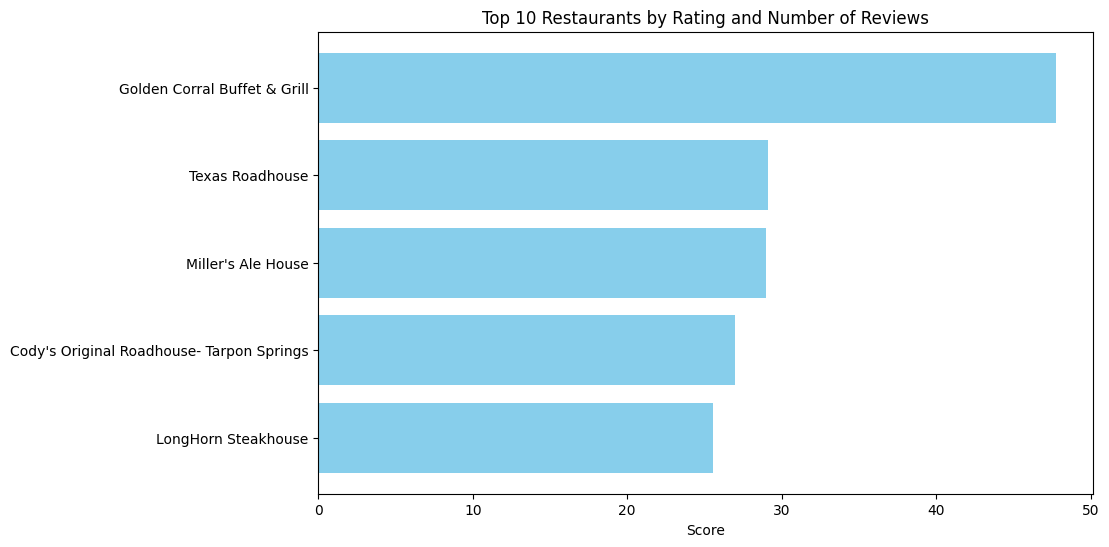

In [70]:
# Crear una nueva columna que combine rating y número de reviews
# Puedes ajustar los pesos según tu criterio
metadata_sitios['score'] = metadata_sitios['avg_rating'] + 0.01 * metadata_sitios['num_of_reviews']

# Seleccionar los 10 restaurantes con mayor 'score'
top_rated_restaurants = metadata_sitios.nlargest(10, 'score')

# Crear un gráfico de barras
plt.figure(figsize=[10,6])
plt.barh(top_rated_restaurants['name'], top_rated_restaurants['score'], color='skyblue')
plt.xlabel('Score')
plt.title('Top 10 Restaurants by Rating and Number of Reviews')
plt.gca().invert_yaxis()  # Para mostrar el restaurante con el mayor 'score' en la parte superior
plt.show()

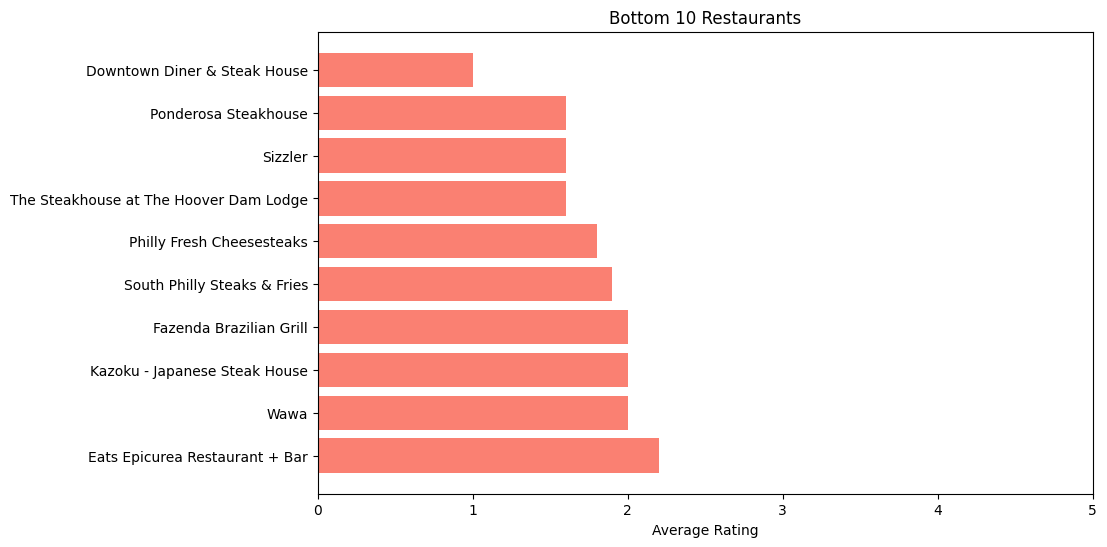

In [71]:
# Seleccionar los 10 restaurantes con menor avg_rating
lowest_rated_restaurants = metadata_sitios.nsmallest(10, 'avg_rating')

# Crear un gráfico de barras
plt.figure(figsize=[10,6])
plt.barh(lowest_rated_restaurants['name'], lowest_rated_restaurants['avg_rating'], color='salmon')
plt.xlabel('Average Rating')
plt.title('Bottom 10 Restaurants')
plt.xlim([0, 5])  # Asumiendo que la calificación es de 0 a 5
plt.gca().invert_yaxis()  # Para mostrar el restaurante con la menor calificación en la parte superior
plt.show()

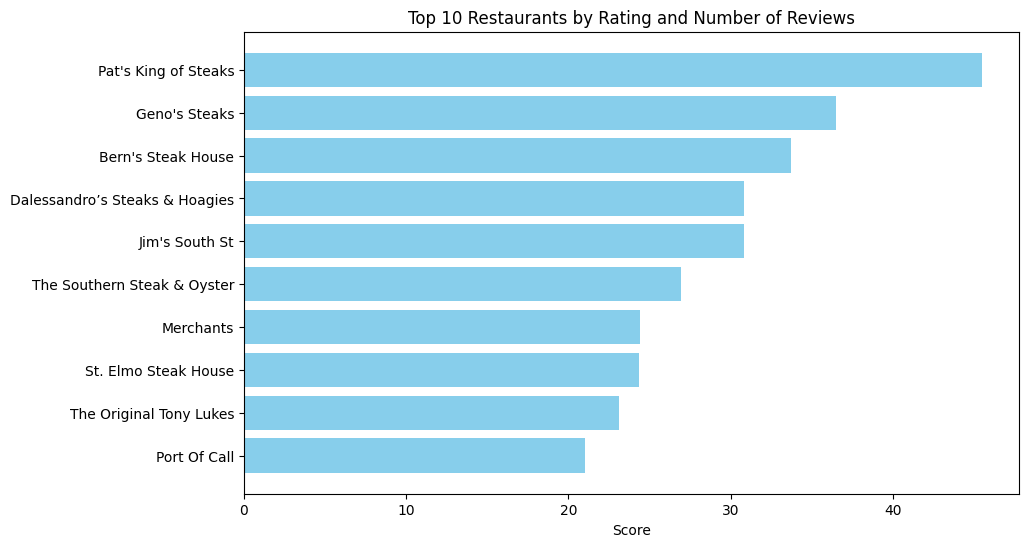

In [72]:
# Crear una nueva columna que combine rating y número de reviews
# Puedes ajustar los pesos según tu criterio
business['score'] = business['stars'] + 0.01 * business['review_count']

# Seleccionar los 10 restaurantes con mayor 'score'
top_rated_restaurants = business.nlargest(10, 'score')

# Crear un gráfico de barras
plt.figure(figsize=[10,6])
plt.barh(top_rated_restaurants['name'], top_rated_restaurants['score'], color='skyblue')
plt.xlabel('Score')
plt.title('Top 10 Restaurants by Rating and Number of Reviews')
plt.gca().invert_yaxis()  # Para mostrar el restaurante con el mayor 'score' en la parte superior
plt.show()

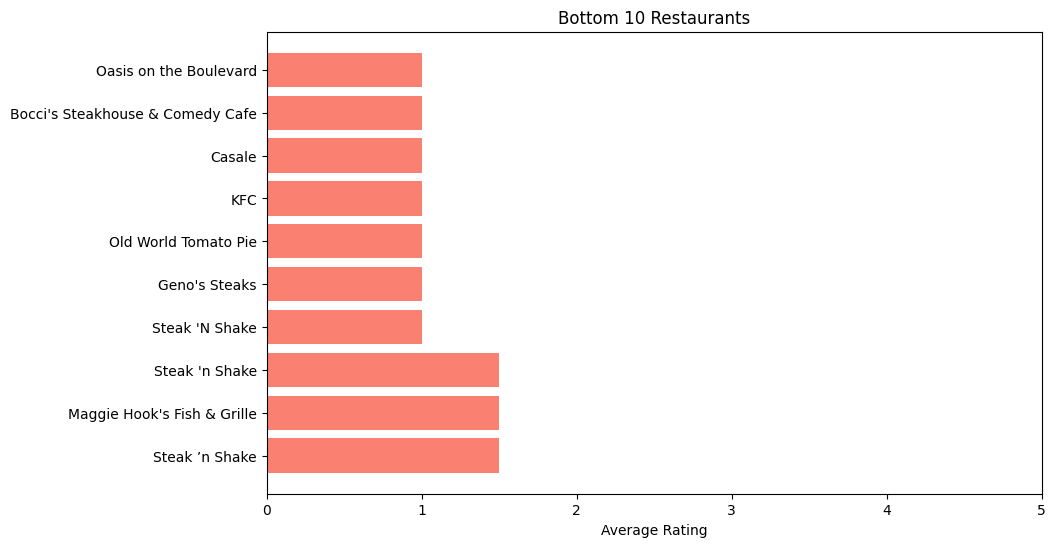

In [73]:
# Seleccionar los 10 restaurantes con menor avg_rating
lowest_rated_restaurants = business.nsmallest(10, 'stars')

# Crear un gráfico de barras
plt.figure(figsize=[10,6])
plt.barh(lowest_rated_restaurants['name'], lowest_rated_restaurants['stars'], color='salmon')
plt.xlabel('Average Rating')
plt.title('Bottom 10 Restaurants')
plt.xlim([0, 5])  # Asumiendo que la calificación es de 0 a 5
plt.gca().invert_yaxis()  # Para mostrar el restaurante con la menor calificación en la parte superior
plt.show()

Combinancion de datos de google y yelp

In [74]:
combined_google = pd.merge(metadata_sitios, reviews_estados, on='gmap_id', how='inner')


In [75]:
combined_yelp_1 = pd.merge(business, review, on='business_id', how='inner')
combined_yelp_2 = pd.merge(combined_yelp_1, user, on='user_id', how='inner')
combined_yelp_3 = pd.merge(combined_yelp_2, tip, on=['business_id', 'user_id'], how='inner')
combined_yelp_4 = pd.merge(combined_yelp_3, checkin, on='business_id', how='inner')


Comparar Datos de Google y Yelp

In [86]:
from rapidfuzz import process, fuzz

def get_match(name, list_names, min_score=0):
    match = process.extractOne(name, list_names, scorer=fuzz.token_sort_ratio)
    if match and match[1] >= min_score:
        return match[0]
    return ""


business['matched_name'] = business['name'].apply(lambda x: get_match(x, combined_google['name']))



Visualizar la distribución de calificaciones en los datos de Google

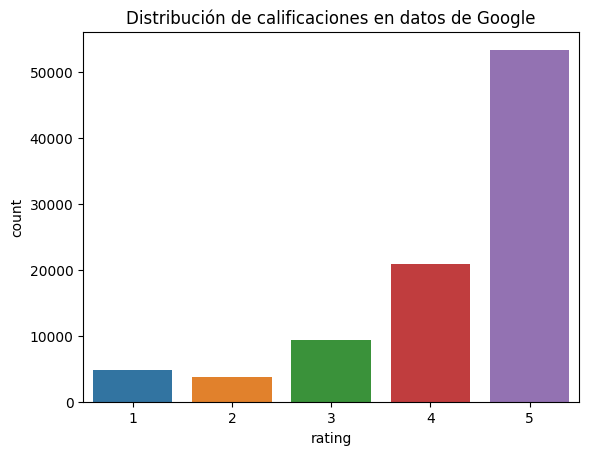

In [78]:
sns.countplot(data=combined_google, x='rating')
plt.title('Distribución de calificaciones en datos de Google')
plt.show()


Visualizar la distribución de calificaciones en los datos de Yelp

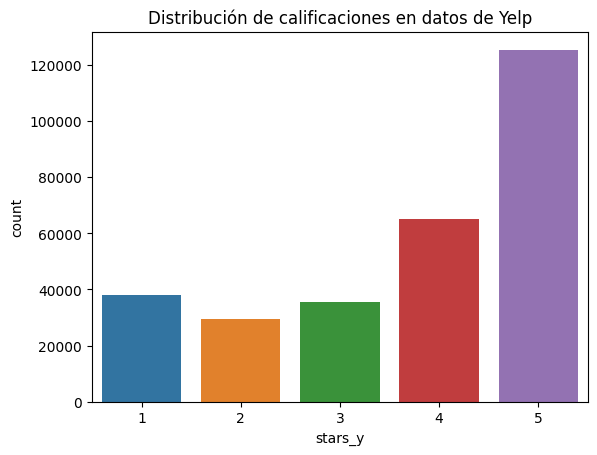

In [82]:
sns.countplot(data=combined_yelp_1, x='stars_y')
plt.title('Distribución de calificaciones en datos de Yelp')
plt.show()


Comparar la cantidad de reseñas entre Google y Yelp para negocios comunes

In [87]:
# Agregar columna de fuente
combined_google['source'] = 'Google'
combined_yelp_4['source'] = 'Yelp'

# Seleccionar columnas comunes para la concatenación
common_columns = list(set(combined_google.columns) & set(combined_yelp_4.columns))

# Concatenar los DataFrames
combined_all = pd.concat([combined_google[common_columns], combined_yelp_4[common_columns]], ignore_index=True)


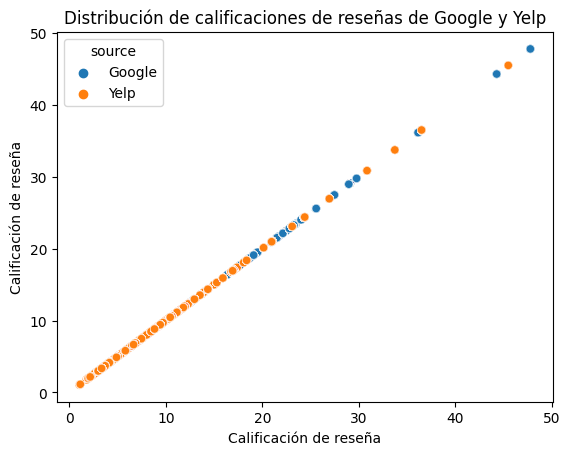

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=combined_all, x='score', y='score', hue='source', alpha=0.5)
plt.xlabel('Calificación de reseña')
plt.ylabel('Calificación de reseña')  # Esto será igual al eje x, ya que estamos graficando score vs. score
plt.title('Distribución de calificaciones de reseñas de Google y Yelp')
plt.show()



Visualizar la distribución de la cantidad de reseñas por estado en datos de Google

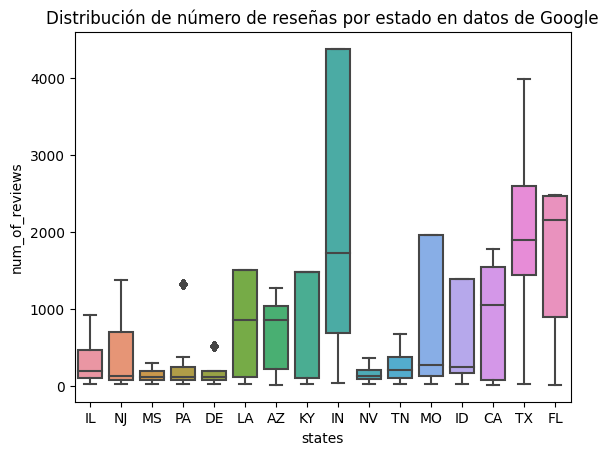

In [91]:
sns.boxplot(data=combined_google, x='states', y='num_of_reviews')
plt.title('Distribución de número de reseñas por estado en datos de Google')
plt.show()
